In [151]:
import numpy as np
import re
def string_to_array(seq_string):
   seq_string = seq_string.lower()
   seq_string = re.sub('[^acgt]', 'n', seq_string)
   seq_string = np.array(list(seq_string))
   return seq_string
# create a label encoder with 'acgtn' alphabet
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
label_encoder.fit(np.array(['a','c','g','t','z']))

LabelEncoder()

In [152]:
def ordinal_encoder(my_array):
    integer_encoded = label_encoder.transform(my_array)
    float_encoded = integer_encoded.astype(float)
    float_encoded[float_encoded == 0] = 0.25 # A
    float_encoded[float_encoded == 1] = 0.50 # C
    float_encoded[float_encoded == 2] = 0.75 # G
    float_encoded[float_encoded == 3] = 1.00 # T
    float_encoded[float_encoded == 4] = 0.00 # anything else, lets say n
    return float_encoded


#Let’s try it out a simple short sequence:
seq_test = 'TTCAGCCAGTG'
ordinal_encoder(string_to_array(seq_test))

array([1.  , 1.  , 0.5 , 0.25, 0.75, 0.5 , 0.5 , 0.25, 0.75, 1.  , 0.75])

In [153]:
from sklearn.preprocessing import OneHotEncoder
def one_hot_encoder(seq_string):
    int_encoded = label_encoder.transform(seq_string)
    onehot_encoder = OneHotEncoder(sparse=False, dtype=int)
    int_encoded = int_encoded.reshape(len(int_encoded), 1)
    onehot_encoded = onehot_encoder.fit_transform(int_encoded)
    onehot_encoded = np.delete(onehot_encoded, -1, 1)
    return onehot_encoded


#So let’s try it out with a simple short sequence:
seq_test = 'GAATTCTCGAA'
one_hot_encoder(string_to_array(seq_test))

array([[0, 0, 1],
       [1, 0, 0],
       [1, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [0, 1, 0],
       [0, 0, 0],
       [0, 1, 0],
       [0, 0, 1],
       [1, 0, 0],
       [1, 0, 0]])

In [154]:
def Kmers_funct(seq, size):
    return [seq[x:x+size].lower() for x in range(len(seq) - size + 1)]
mySeq = 'GTGCCCAGGTTCAGTGAGTGACACAGGCAG'
Kmers_funct(mySeq, size=7)

words = Kmers_funct(mySeq, size=6)
joined_sentence = ' '.join(words)
joined_sentence


'gtgccc tgccca gcccag cccagg ccaggt caggtt aggttc ggttca gttcag ttcagt tcagtg cagtga agtgag gtgagt tgagtg gagtga agtgac gtgaca tgacac gacaca acacag cacagg acaggc caggca aggcag'

In [155]:
mySeq1 = 'TCTCACACATGTGCCAATCACTGTCACCC'
mySeq2 = 'GTGCCCAGGTTCAGTGAGTGACACAGGCAG'
sentence1 = ' '.join(Kmers_funct(mySeq1, size=6))
sentence2 = ' '.join(Kmers_funct(mySeq2, size=6))

In [156]:
#Creating the Bag of Words model:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()
X = cv.fit_transform([joined_sentence, sentence1, sentence2]).toarray()
X

array([[0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0,
        1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1,
        0, 1, 0, 0, 1],
       [1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1,
        0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0,
        1, 0, 1, 1, 0],
       [0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0,
        1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1,
        0, 1, 0, 0, 1]], dtype=int64)

In [157]:
import numpy as np 
import pandas as pd
import os
import matplotlib.pyplot as plt
%matplotlib inline
for dirname, _, filenames in os.walk('input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [158]:
human_dna = pd.read_table('human_data.txt')
human_dna.head()

,sequence,class
0,ATGCCCCAACTAAATACTACCGTATGGCCCACCATAATTACCCCCA...,4
1,ATGAACGAAAATCTGTTCGCTTCATTCATTGCCCCCACAATCCTAG...,4
2,ATGTGTGGCATTTGGGCGCTGTTTGGCAGTGATGATTGCCTTTCTG...,3
3,ATGTGTGGCATTTGGGCGCTGTTTGGCAGTGATGATTGCCTTTCTG...,3
4,ATGCAACAGCATTTTGAATTTGAATACCAGACCAAAGTGGATGGTG...,3


Text(0, 0.5, 'No. of sequences')

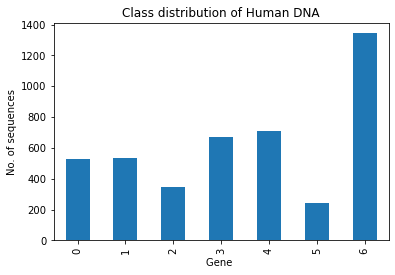

In [159]:
human_dna['class'].value_counts().sort_index().plot.bar()
plt.title("Class distribution of Human DNA")
plt.xlabel('Gene ')
plt.ylabel('No. of sequences')


In [160]:
chimp_dna = pd.read_table('chimp_data.txt')
chimp_dna.head()

,sequence,class
0,ATGCCCCAACTAAATACCGCCGTATGACCCACCATAATTACCCCCA...,4
1,ATGAACGAAAATCTATTCGCTTCATTCGCTGCCCCCACAATCCTAG...,4
2,ATGGCCTCGCGCTGGTGGCGGTGGCGACGCGGCTGCTCCTGGAGGC...,4
3,ATGGCCTCGCGCTGGTGGCGGTGGCGACGCGGCTGCTCCTGGAGGC...,4
4,ATGGGCAGCGCCAGCCCGGGTCTGAGCAGCGTGTCCCCCAGCCACC...,6


Text(0.5, 1.0, 'Class distribution of Chimpanzee DNA')

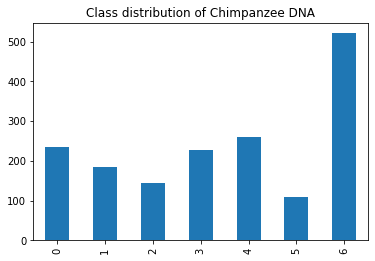

In [161]:
chimp_dna['class'].value_counts().sort_index().plot.bar()
plt.title("Class distribution of Chimpanzee DNA")

In [162]:
dog_dna = pd.read_table('dog_data.txt')
dog_dna.head()

,sequence,class
0,ATGCCACAGCTAGATACATCCACCTGATTTATTATAATCTTTTCAA...,4
1,ATGAACGAAAATCTATTCGCTTCTTTCGCTGCCCCCTCAATAATAG...,4
2,ATGGAAACACCCTTCTACGGCGATGAGGCGCTGAGCGGCCTGGGCG...,6
3,ATGTGCACTAAAATGGAACAGCCCTTCTACCACGACGACTCATACG...,6
4,ATGAGCCGGCAGCTAAACAGAAGCCAGAACTGCTCCTTCAGTGACG...,0


Text(0.5, 1.0, 'Class distribution of Dog DNA')

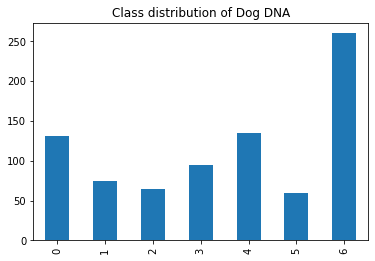

In [163]:
dog_dna['class'].value_counts().sort_index().plot.bar()
plt.title("Class distribution of Dog DNA")

In [164]:
def Kmers_funct(seq, size=6):
    return [seq[x:x+size].lower() for x in range(len(seq) - size + 1)]

# #convert our training data sequences into short overlapping k-mers of length 6. 
# #Lets do that for each species of data we have using our Kmers_funct function.

human_dna['words'] = human_dna.apply(lambda x: Kmers_funct(x['sequence']), axis=1)
human_dna = human_dna.drop(['sequence'], axis=1)

chimp_dna['words'] = chimp_dna.apply(lambda x: Kmers_funct(x['sequence']), axis=1)
chimp_dna = chimp_dna.drop('sequence', axis=1)

dog_dna['words'] = dog_dna.apply(lambda x: Kmers_funct(x['sequence']), axis=1)
dog_dna = dog_dna.drop('sequence', axis=1)

In [165]:
human_dna.head()

,class,words
0,4,"[atgccc, tgcccc, gcccca, ccccaa, cccaac, ccaac..."
1,4,"[atgaac, tgaacg, gaacga, aacgaa, acgaaa, cgaaa..."
2,3,"[atgtgt, tgtgtg, gtgtgg, tgtggc, gtggca, tggca..."
3,3,"[atgtgt, tgtgtg, gtgtgg, tgtggc, gtggca, tggca..."
4,3,"[atgcaa, tgcaac, gcaaca, caacag, aacagc, acagc..."


In [166]:
human_texts = list(human_dna['words'])
for item in range(len(human_texts)):
    human_texts[item] = ' '.join(human_texts[item])
#separate labels
y_human = human_dna.iloc[:, 0].values # y_human for human_dna

In [167]:
chimp_texts = list(chimp_dna['words'])
for item in range(len(chimp_texts)):
    chimp_texts[item] = ' '.join(chimp_texts[item])
#separate labels
y_chim = chimp_dna.iloc[:, 0].values # y_chim for chimp_dna

dog_texts = list(dog_dna['words'])
for item in range(len(dog_texts)):
    dog_texts[item] = ' '.join(dog_texts[item])
#separate labels
y_dog = dog_dna.iloc[:, 0].values  # y_dog for dog_dna

In [168]:
y_human

array([4, 4, 3, ..., 6, 6, 6], dtype=int64)

In [169]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(ngram_range=(4,4)) #The n-gram size of 4 is previously determined by testing
X = cv.fit_transform(human_texts)
X_chimp = cv.transform(chimp_texts)
X_dog = cv.transform(dog_texts)

In [170]:
print(X.shape)
print(X_chimp.shape)
print(X_dog.shape)

(4380, 232414)
(1682, 232414)
(820, 232414)


In [171]:
# Splitting the human dataset into the training set and test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y_human,test_size = 0.20,random_state=42)

In [172]:
from sklearn.naive_bayes import MultinomialNB
classifier = MultinomialNB(alpha=0.1)
classifier.fit(X_train, y_train)

MultinomialNB(alpha=0.1)

In [173]:
y_pred = classifier.predict(X_test)

Confusion matrix for predictions on human test DNA sequence



<AxesSubplot:>

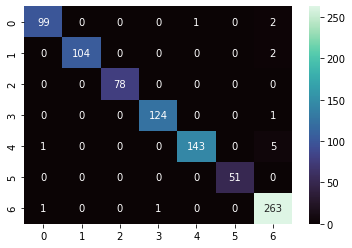

In [174]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
print("Confusion matrix for predictions on human test DNA sequence\n")
cm = confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot=True,fmt='d',cmap='mako')

In [175]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.98      0.97      0.98       102
           1       1.00      0.98      0.99       106
           2       1.00      1.00      1.00        78
           3       0.99      0.99      0.99       125
           4       0.99      0.96      0.98       149
           5       1.00      1.00      1.00        51
           6       0.96      0.99      0.98       265

    accuracy                           0.98       876
   macro avg       0.99      0.99      0.99       876
weighted avg       0.98      0.98      0.98       876



Confusion matrix for predictions on Chimpanzee test DNA sequence



<AxesSubplot:>

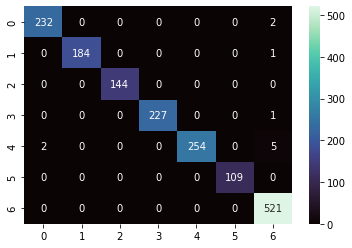

In [176]:
y_pred_chimp = classifier.predict(X_chimp)
print("Confusion matrix for predictions on Chimpanzee test DNA sequence\n")
cm = confusion_matrix(y_chim,y_pred_chimp)
sns.heatmap(cm,annot=True,fmt='d',cmap='mako')

In [177]:
print(classification_report(y_chim,y_pred_chimp))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       234
           1       1.00      0.99      1.00       185
           2       1.00      1.00      1.00       144
           3       1.00      1.00      1.00       228
           4       1.00      0.97      0.99       261
           5       1.00      1.00      1.00       109
           6       0.98      1.00      0.99       521

    accuracy                           0.99      1682
   macro avg       1.00      0.99      0.99      1682
weighted avg       0.99      0.99      0.99      1682



Confusion matrix for predictions on Dog test DNA sequence



<AxesSubplot:>

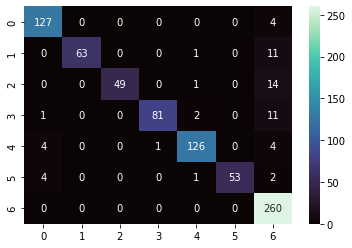

In [178]:
y_pred_dog = classifier.predict(X_dog)
print("Confusion matrix for predictions on Dog test DNA sequence\n")
cm = confusion_matrix(y_dog,y_pred_dog)
sns.heatmap(cm,annot=True,fmt='d',cmap='mako')

In [179]:
print(classification_report(y_dog,y_pred_dog))

              precision    recall  f1-score   support

           0       0.93      0.97      0.95       131
           1       1.00      0.84      0.91        75
           2       1.00      0.77      0.87        64
           3       0.99      0.85      0.92        95
           4       0.96      0.93      0.95       135
           5       1.00      0.88      0.94        60
           6       0.85      1.00      0.92       260

    accuracy                           0.93       820
   macro avg       0.96      0.89      0.92       820
weighted avg       0.93      0.93      0.93       820



In [180]:
from sklearn.tree import DecisionTreeClassifier
DTC = DecisionTreeClassifier()
DTC.fit(X_train, y_train)

DecisionTreeClassifier()

Confusion matrix for predictions on Chimpanzee test DNA sequence



<AxesSubplot:>

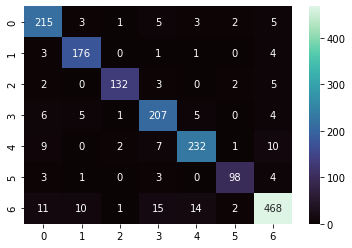

In [181]:
print("Confusion matrix for predictions on Chimpanzee test DNA sequence\n")
y_pred_chim = DTC.predict(X_chimp)
cm = confusion_matrix(y_chim,y_pred_chim)
sns.heatmap(cm,annot=True,fmt='d',cmap='mako')

In [182]:
print(classification_report(y_chim,y_pred_chim))

              precision    recall  f1-score   support

           0       0.86      0.92      0.89       234
           1       0.90      0.95      0.93       185
           2       0.96      0.92      0.94       144
           3       0.86      0.91      0.88       228
           4       0.91      0.89      0.90       261
           5       0.93      0.90      0.92       109
           6       0.94      0.90      0.92       521

    accuracy                           0.91      1682
   macro avg       0.91      0.91      0.91      1682
weighted avg       0.91      0.91      0.91      1682



Confusion matrix for predictions on Dog test DNA sequence



<AxesSubplot:>

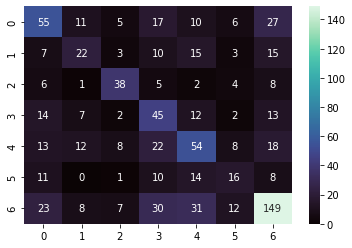

In [183]:
y_pred = DTC.predict(X_dog)
print("Confusion matrix for predictions on Dog test DNA sequence\n")
cm = confusion_matrix(y_dog,y_pred)
sns.heatmap(cm,annot=True,fmt='d',cmap='mako')

In [184]:
print(classification_report(y_dog,y_pred))

              precision    recall  f1-score   support

           0       0.43      0.42      0.42       131
           1       0.36      0.29      0.32        75
           2       0.59      0.59      0.59        64
           3       0.32      0.47      0.38        95
           4       0.39      0.40      0.40       135
           5       0.31      0.27      0.29        60
           6       0.63      0.57      0.60       260

    accuracy                           0.46       820
   macro avg       0.43      0.43      0.43       820
weighted avg       0.47      0.46      0.46       820

